In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib_axes_logger.setLevel('ERROR')


In [2]:
#Check the current working directory to see the file path/location
#os.getcwd()

In [66]:
#Set the names for the columns of the seed data
seed_colnames = ["area", "perimeter", "compactness", "klength", "kwidth", "asym", "grooveLength", "type"]
#Import the seed data, with the column names specified above
seeddata = pd.read_csv('/Users/ryansmith/Desktop/School/STA 160/STA_160_Project_Midterm/seeds_dataset.txt', 
                      delim_whitespace = True, names = seed_colnames)
#Drop any NA values by removing rows containing NAs
seeddata.dropna(axis = 0)
seeddata

,area,perimeter,compactness,klength,kwidth,asym,grooveLength,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


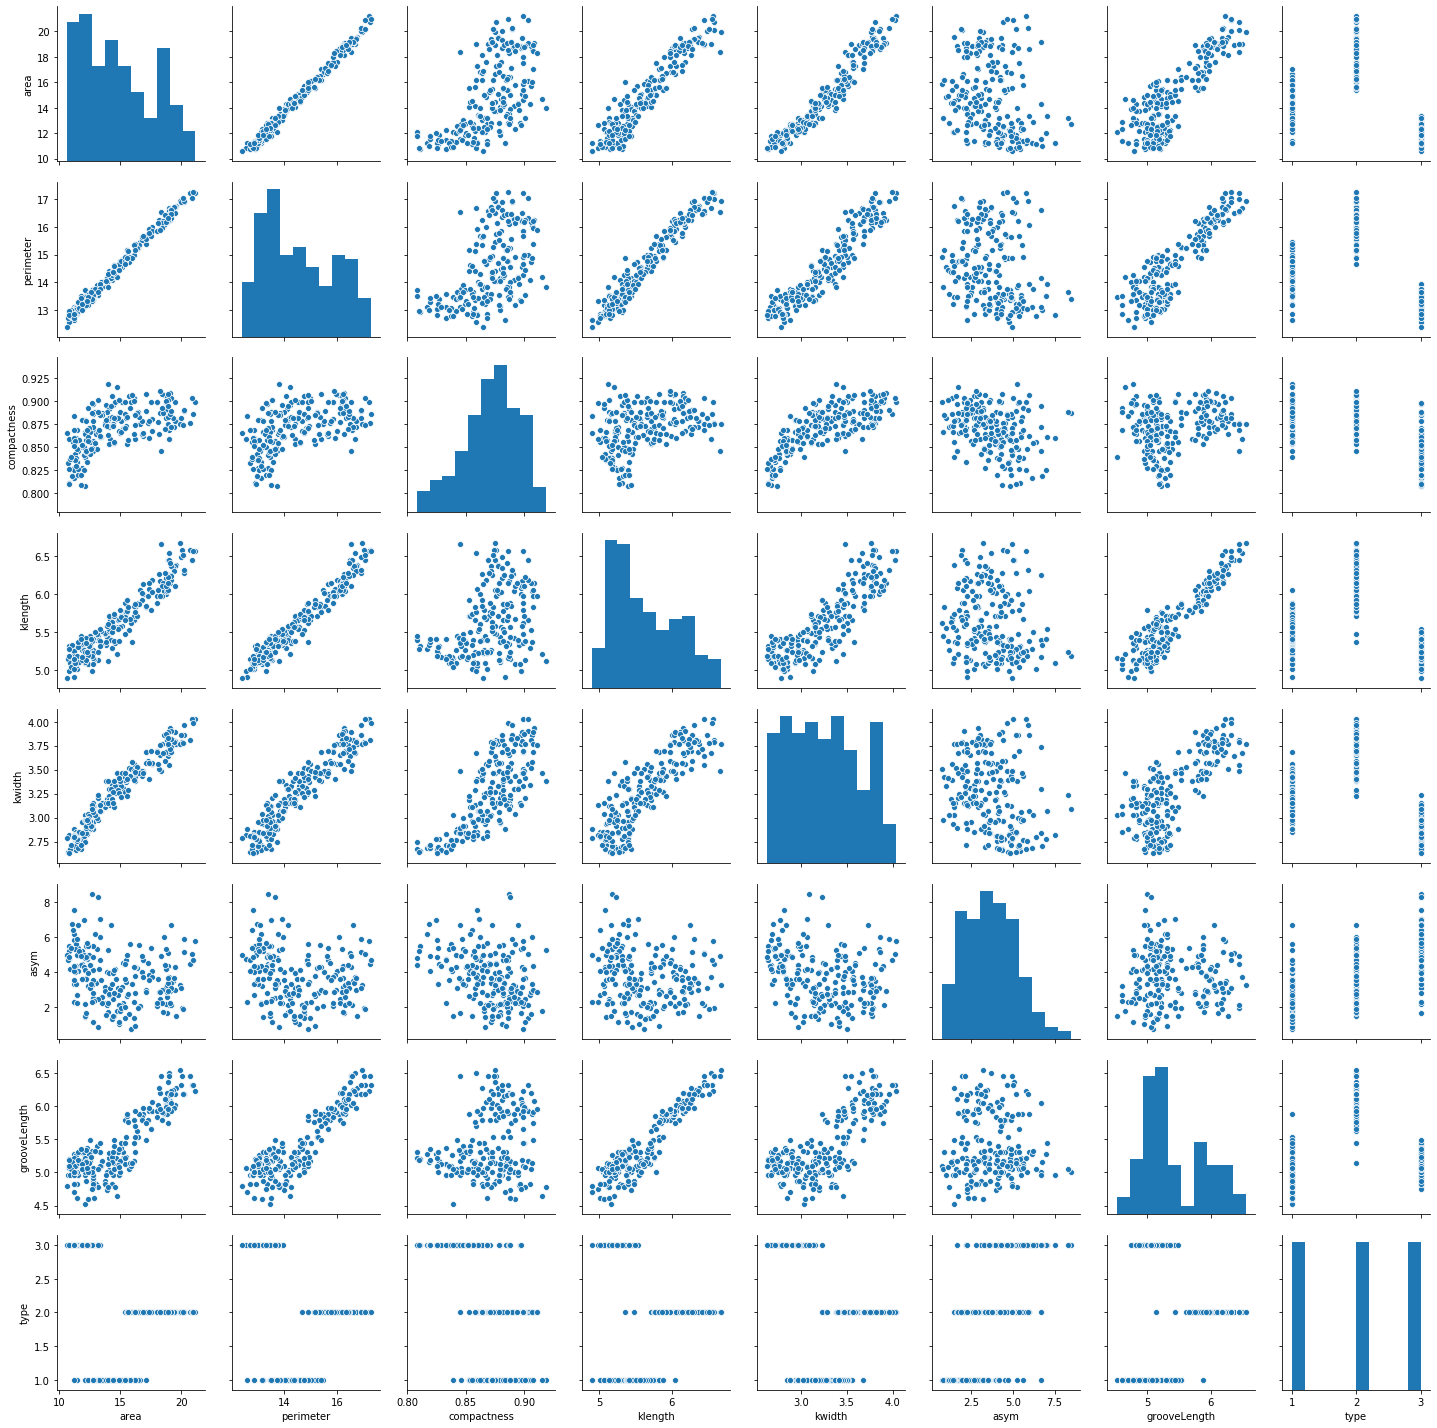

In [4]:
sns.pairplot(seeddata)



/Users/ryansmith/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ryansmith/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


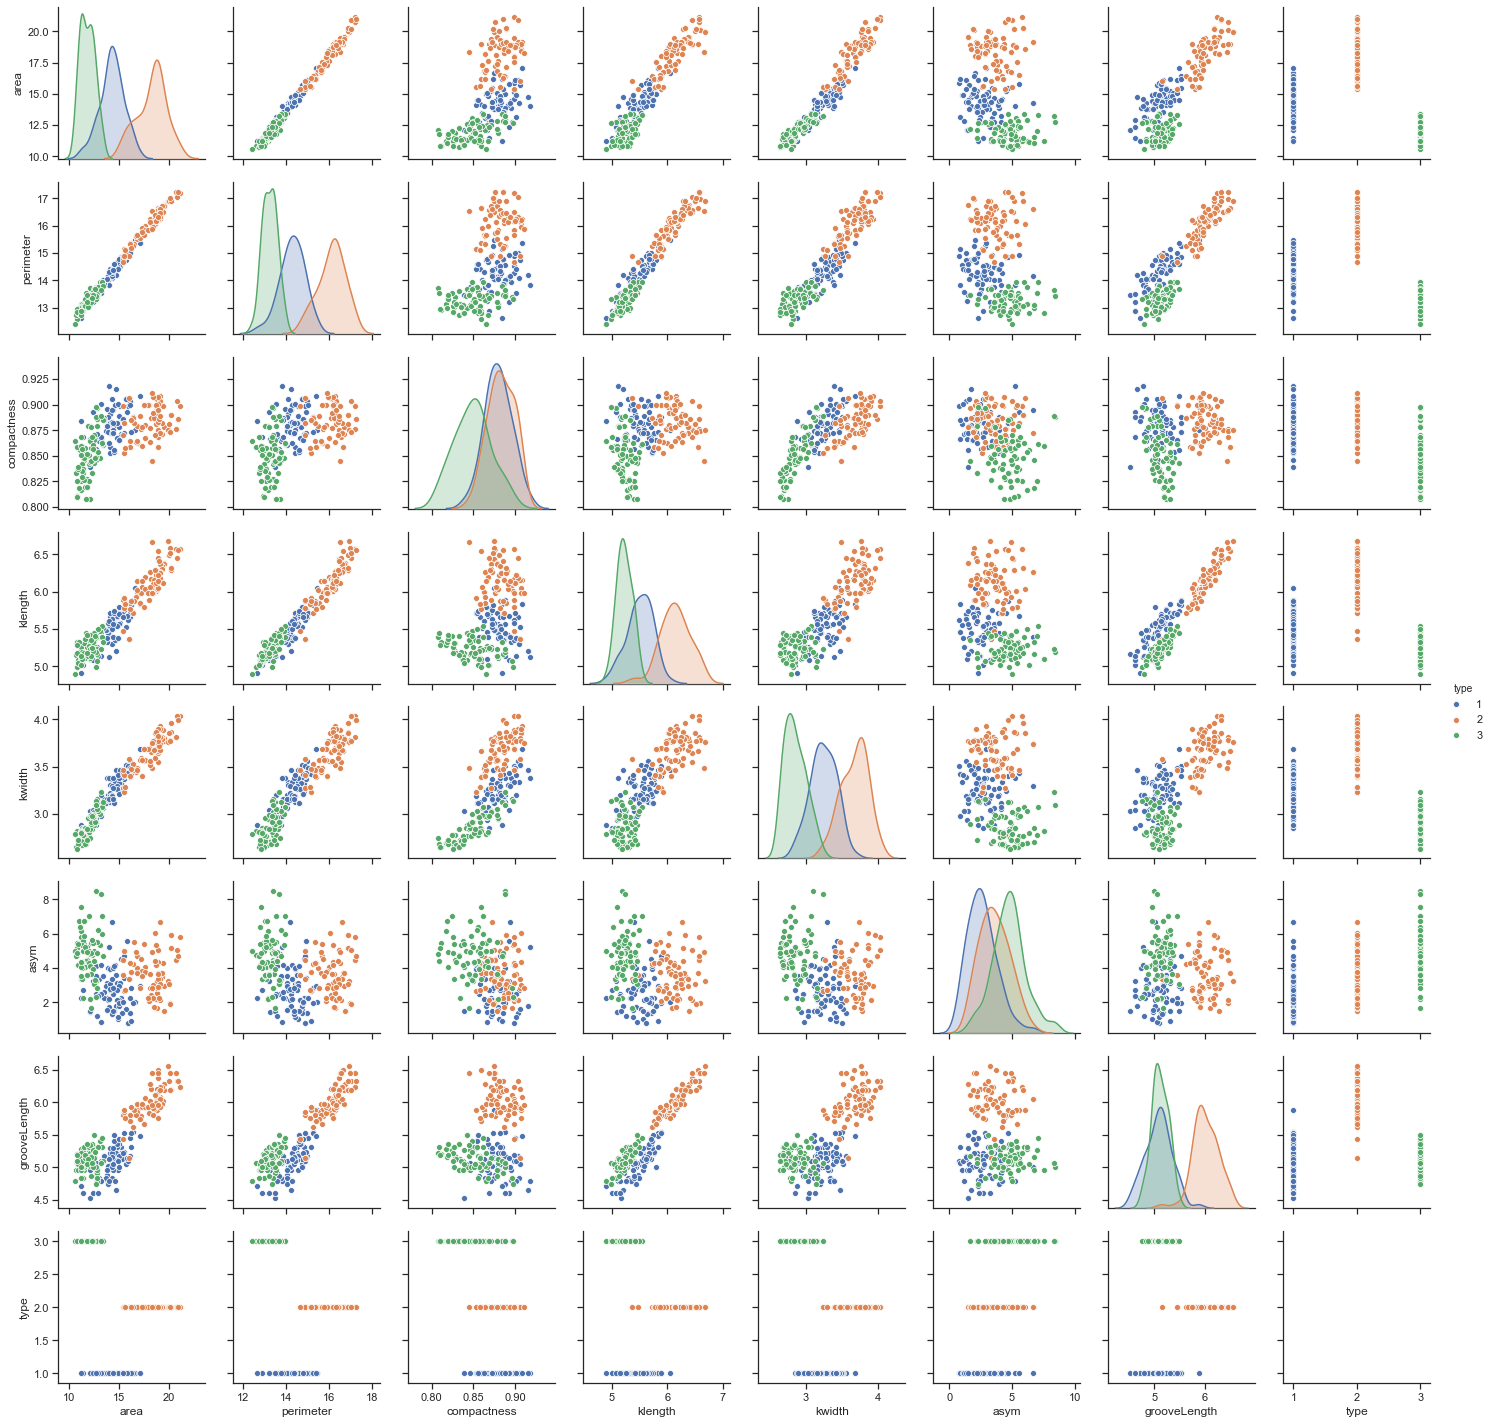

In [5]:
sns.set(style="ticks")
sns.pairplot(seeddata, hue="type")

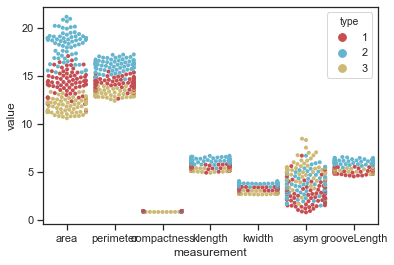

In [6]:
seed_data_melt = pd.melt(seeddata, "type", var_name = "measurement")
sns.swarmplot(x="measurement", y="value", hue="type",
              palette=["r", "c", "y"], data=seed_data_melt, size = 4)

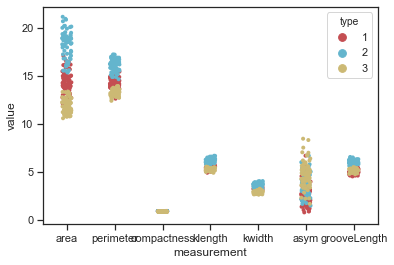

In [7]:
sns.stripplot(x="measurement", y="value", hue="type",
              palette=["r", "c", "y"], data=seed_data_melt, size = 4)

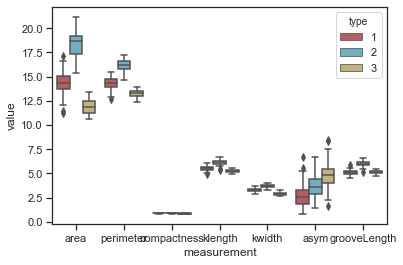

In [8]:
sns.boxplot(x="measurement", y="value", hue="type",
              palette=["r", "c", "y"], data=seed_data_melt)

In [9]:
seeddata

,area,perimeter,compactness,klength,kwidth,asym,grooveLength,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [10]:
seeddata_scaled = seeddata
seeddata_scaled.compactness *=15
seeddata_scaled.klength *=3
seeddata_scaled.asym *= 2
seeddata_scaled.grooveLength *=3
seeddata_scaled.kwidth *=4

seeddata_scaled

,area,perimeter,compactness,klength,kwidth,asym,grooveLength,type
0,15.26,14.84,13.0650,17.289,13.248,4.442,15.660,1
1,14.88,14.57,13.2165,16.662,13.332,2.036,14.868,1
2,14.29,14.09,13.5750,15.873,13.348,5.398,14.475,1
3,13.84,13.94,13.4325,15.972,13.516,4.518,14.415,1
4,16.14,14.99,13.5510,16.974,14.248,2.710,15.525,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,13.1745,15.411,11.924,7.262,14.610,3
206,11.23,12.88,12.7665,15.420,11.180,8.650,15.009,3
207,13.20,13.66,13.3245,15.708,12.928,16.630,15.168,3
208,11.84,13.21,12.7815,15.525,11.344,7.196,15.132,3


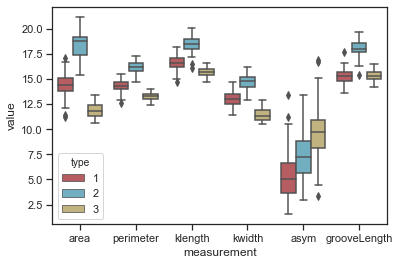

In [11]:
seed_data_scaled2 = seeddata_scaled.drop(['compactness'], axis = 1)
seed_data_melt1 = pd.melt(seed_data_scaled2, "type", var_name = "measurement")
sns.boxplot(x="measurement", y="value", hue="type",
              palette=["r", "c", "y"], data=seed_data_melt1)

5

In [25]:
#Set the names for the columns of the seed data
car_colnames = ["symboling", "norm_loss", "make", "fuel", "aspiration", "ndoors", "body", "drive", "engine_loc",
                 "wheel_base", "length", "width", "height", "weight", "engine_type", "ncyl", "engine_size", 
                 "fuel_sys", "bore", "stroke", "compress_rat", "hp", "rpm", "cmpg", "hmpg", "price"]
#Import the seed data, with the column names specified above
cardata = pd.read_csv('/Users/ryansmith/Desktop/School/STA 160/STA_160_Project_Midterm/imports-85.data', 
                     names = car_colnames)
cardata.dropna(axis = 1)

symboling       False
norm_loss       False
make            False
fuel            False
aspiration      False
ndoors          False
body            False
drive           False
engine_loc      False
wheel_base      False
length          False
width           False
height          False
weight          False
engine_type     False
ncyl            False
engine_size     False
fuel_sys        False
bore            False
stroke          False
compress_rat    False
hp              False
rpm             False
cmpg            False
hmpg            False
price           False
dtype: bool

In [21]:
cardata.dtypes

symboling         int64
norm_loss        object
make             object
fuel             object
aspiration       object
ndoors           object
body             object
drive            object
engine_loc       object
wheel_base      float64
length          float64
width           float64
height          float64
weight            int64
engine_type      object
ncyl             object
engine_size       int64
fuel_sys         object
bore             object
stroke           object
compress_rat    float64
hp               object
rpm              object
cmpg              int64
hmpg              int64
price            object
dtype: object

In [31]:
#Create a new dataframe only containing horsepower and price
hp_price = cardata[['hp','price']]
#Remove rows that are missing values
hp_price = hp_price[(hp_price != '?').all(axis=1)]

,hp,price
0,111,13495
1,111,16500
2,154,16500
3,102,13950
4,115,17450
...,...,...
200,114,16845
201,160,19045
202,134,21485
203,106,22470


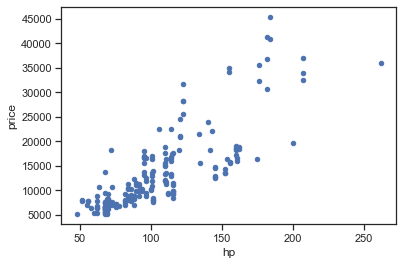

In [51]:
#Converting HP and price to numeric float variables.
hp_price['hp'] = hp_price['hp'].astype(float)
hp_price['price'] = hp_price['price'].astype(float)


hp_price.plot(kind = 'scatter', x = 'hp', y = 'price')
plt.show()

In [53]:
hp_price.cov()

,hp,price
hp,1410.291102,2.428609e+05
price,242860.943734,6.365978e+07


In [55]:
hp_price.corr()

,hp,price
hp,1.000000,0.810533
price,0.810533,1.000000


/Users/ryansmith/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


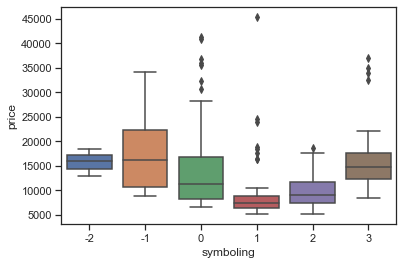

In [64]:
symboling_price = cardata[['symboling', 'price']]
symboling_price = symboling_price[(symboling_price != '?').all(axis = 1)]


symboling_price['price'] = symboling_price['price'].astype(float)
sns.boxplot(y = 'price', x = 'symboling', data = symboling_price)

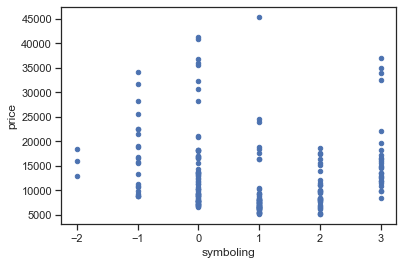

In [65]:
symboling_price.plot(kind = 'scatter', x = 'symboling', y = 'price')